## Importing data

In [44]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [45]:
#Importing cdmx elections participation data
gdf = gpd.read_file("../../data/external/gobernance/cdmx/secciones_cdmx2021.gpkg")

In [47]:
gdf

,Name,alcaldia,distrito,circunscripcion,seccion,listanominal,ayun_votos,parti_ayun,mr_votos,parti_mr,rp_votos,parti_rp,geometry
0,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 1,Azcapotzalco,5,3,1,761,391.0,0.513798,389.0,0.511170,389.0,0.511170,"POLYGON Z ((-99.15901 19.47374 0.00000, -99.15..."
1,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 2,Azcapotzalco,5,3,2,989,588.0,0.594540,584.0,0.590495,584.0,0.590495,"POLYGON Z ((-99.15266 19.47330 0.00000, -99.15..."
2,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 3,Azcapotzalco,5,3,3,1000,481.0,0.481000,481.0,0.481000,481.0,0.481000,"POLYGON Z ((-99.14998 19.47329 0.00000, -99.15..."
3,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 4,Azcapotzalco,5,3,4,1034,584.0,0.564797,585.0,0.565764,585.0,0.565764,"POLYGON Z ((-99.14906 19.47338 0.00000, -99.14..."
4,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 5,Azcapotzalco,5,3,5,1079,553.0,0.512512,564.0,0.522706,564.0,0.522706,"POLYGON Z ((-99.14590 19.47322 0.00000, -99.14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,"Magdalena Contreras, La-Dtto.Local-33-Circuns-...","Magdalena Contreras, La",33,4,5557,1436,697.0,0.485376,698.0,0.486072,698.0,0.486072,"POLYGON Z ((-99.24676 19.27139 0.00000, -99.24..."
5531,"Magdalena Contreras, La-Dtto.Local-33-Circuns-...","Magdalena Contreras, La",33,4,5558,1303,475.0,0.364543,475.0,0.364543,475.0,0.364543,"POLYGON Z ((-99.24499 19.27623 0.00000, -99.24..."
5532,"Magdalena Contreras, La-Dtto.Local-33-Circuns-...","Magdalena Contreras, La",33,4,5559,1500,648.0,0.432000,648.0,0.432000,648.0,0.432000,"POLYGON Z ((-99.24414 19.27230 0.00000, -99.24..."
5533,Álvaro Obregón-Dtto.Local-20-Circuns-1-Secc- 5560,Álvaro Obregón,20,1,5560,1210,507.0,0.419008,507.0,0.419008,507.0,0.419008,"POLYGON Z ((-99.26561 19.31805 0.00000, -99.26..."


<AxesSubplot:>

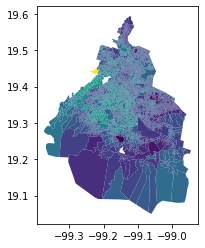

In [6]:
gdf.plot("parti_ayun")

## Data treatment

### Creating parti_max

In [49]:
#There is data for three types of elections. Ayuntamiento (ayun), Mayoría Relativa (mr) and Representación Proporcional (rp)
gdf[["parti_ayun","parti_mr","parti_rp"]]

,parti_ayun,parti_mr,parti_rp
0,0.513798,0.511170,0.511170
1,0.594540,0.590495,0.590495
2,0.481000,0.481000,0.481000
3,0.564797,0.565764,0.565764
4,0.512512,0.522706,0.522706
...,...,...,...
5530,0.485376,0.486072,0.486072
5531,0.364543,0.364543,0.364543
5532,0.432000,0.432000,0.432000
5533,0.419008,0.419008,0.419008


In [54]:
#Finding the highest participation percentaje. axis=1 indicates to find the max per row, not column.
gdf["parti_max"] = gdf[["parti_ayun","parti_mr","parti_rp"]].max(axis=1)

In [55]:
gdf.head(4)

,Name,alcaldia,distrito,circunscripcion,seccion,listanominal,ayun_votos,parti_ayun,mr_votos,parti_mr,rp_votos,parti_rp,geometry,parti_max
0,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 1,Azcapotzalco,5,3,1,761,391.0,0.513798,389.0,0.511170,389.0,0.511170,"POLYGON Z ((-99.15901 19.47374 0.00000, -99.15...",0.513798
1,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 2,Azcapotzalco,5,3,2,989,588.0,0.594540,584.0,0.590495,584.0,0.590495,"POLYGON Z ((-99.15266 19.47330 0.00000, -99.15...",0.594540
2,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 3,Azcapotzalco,5,3,3,1000,481.0,0.481000,481.0,0.481000,481.0,0.481000,"POLYGON Z ((-99.14998 19.47329 0.00000, -99.15...",0.481000
3,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 4,Azcapotzalco,5,3,4,1034,584.0,0.564797,585.0,0.565764,585.0,0.565764,"POLYGON Z ((-99.14906 19.47338 0.00000, -99.14...",0.565764


### Removing higher than 1 values

In [57]:
#Locating where values exceed 100% participation
idx = gdf["parti_max"] > 1
gdf.loc[idx]

,Name,alcaldia,distrito,circunscripcion,seccion,listanominal,ayun_votos,parti_ayun,mr_votos,parti_mr,rp_votos,parti_rp,geometry,parti_max
1066,Gustavo A. Madero-Dtto.Local-2-Circuns-6-Secc-...,Gustavo A. Madero,2,6,1067,823,586.0,0.712029,458.0,0.556501,1057.0,1.284326,"POLYGON Z ((-99.13597 19.48871 0.00000, -99.13...",1.284326
1082,Gustavo A. Madero-Dtto.Local-2-Circuns-2-Secc-...,Gustavo A. Madero,2,2,1083,878,610.0,0.694761,509.0,0.579727,955.0,1.087699,"POLYGON Z ((-99.11716 19.48254 0.00000, -99.11...",1.087699
1706,Iztacalco-Dtto.Local-15-Circuns-1-Secc- 1707,Iztacalco,15,1,1707,1128,608.0,0.539007,1101.0,0.976064,1629.0,1.444149,"POLYGON Z ((-99.09921 19.39691 0.00000, -99.09...",1.444149
2251,Iztapalapa-Dtto.Local-21-Circuns-6-Secc- 2252,Iztapalapa,21,6,2252,1201,868.0,0.722731,1303.0,1.084929,2032.0,1.691923,"POLYGON Z ((-99.05829 19.35948 0.00000, -99.05...",1.691923
4017,Tlalpan-Dtto.Local-16-Circuns-6-Secc- 4023,Tlalpan,16,6,4023,560,598.0,1.067857,597.0,1.066071,597.0,1.066071,"POLYGON Z ((-99.10388 19.29972 0.00000, -99.10...",1.067857
4088,Tlalpan-Dtto.Local-16-Circuns-6-Secc- 4094,Tlalpan,16,6,4094,511,418.0,0.818004,362.0,0.708415,902.0,1.765166,"POLYGON Z ((-99.14103 19.28250 0.00000, -99.14...",1.765166
5072,Miguel Hidalgo-Dtto.Local-13-Circuns-5-Secc- 5082,Miguel Hidalgo,13,5,5082,1028,1314.0,1.278210,1313.0,1.277237,1313.0,1.277237,"POLYGON Z ((-99.22718 19.43612 0.00000, -99.22...",1.278210
5325,Venustiano Carranza-Dtto.Local-10-Circuns-3-Se...,Venustiano Carranza,10,3,5342,944,619.0,0.655720,728.0,0.771186,1002.0,1.061441,"POLYGON Z ((-99.10962 19.43472 0.00000, -99.10...",1.061441
5410,Venustiano Carranza-Dtto.Local-11-Circuns-2-Se...,Venustiano Carranza,11,2,5427,746,459.0,0.615282,436.0,0.584450,868.0,1.163539,"POLYGON Z ((-99.08403 19.43830 0.00000, -99.08...",1.163539


In [58]:
#Changing all values>1 to 1
gdf.loc[idx,"parti_max"] = 1
idx = gdf["parti_max"] > 1
gdf.loc[idx]

,Name,alcaldia,distrito,circunscripcion,seccion,listanominal,ayun_votos,parti_ayun,mr_votos,parti_mr,rp_votos,parti_rp,geometry,parti_max


## Upload data to database

In [59]:
aup.gdf_to_db_slow(gdf,"participacion_cdmx", 'governance', if_exists='replace')

## Link data to hex

### Downloading previous data from database and downloading nodes and edges

In [70]:
cdmxdata = aup.gdf_from_db("participacion_cdmx", 'governance')
cdmxdata.head(1)

,Name,alcaldia,distrito,circunscripcion,seccion,listanominal,ayun_votos,parti_ayun,mr_votos,parti_mr,rp_votos,parti_rp,geometry,parti_max
0,Azcapotzalco-Dtto.Local-5-Circuns-3-Secc- 1,Azcapotzalco,5,3,1,761,391.0,0.513798,389.0,0.51117,389.0,0.51117,"POLYGON Z ((-99.15901 19.47374 0.00000, -99.15...",0.513798


In [61]:
#Download nodes and edges [Función en aup>Data] (gdf de donde busca nodes y edges, ubicación de edges y nodes)
G,nodes,edges = aup.graph_from_hippo(cdmxdata, 'osmnx')

2022-12-08 21:43:17 Created graph from node/edge GeoDataFrames


In [67]:
nodes.head(1)

,x,y,street_count,geometry
osmid,,,,
30339493,-99.134103,19.418057,3,POINT (-99.13410 19.41806)


In [68]:
edges.head(1)

,,,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service
u,v,key,,,,,,,,,,,,,,,
3243547868,3539757271,0,347720629,False,None,Calle Bosque de San Francisco,residential,None,359.208,"LINESTRING (-99.12165 19.19157, -99.12132 19.1...",None,None,None,None,None,None,None


### Participation to nodes

In [71]:
#Function in aup>analysis
#socio_polygon_to_points(nodes,gdf_socio[#info que queremos de cdmxdata],column_start=0 [#2 para que no tome en cuenta los strings Name y alcaldia],
#column_end=-1,cve_column="CVEGEO" [#Normalmente es CVEGEO, pero aquí son los distritos],avg_column=None[#datos]):
cdmx_nodes = aup.socio_polygon_to_points(nodes,cdmxdata[["Name","geometry","parti_max"]],column_start=2,column_end=-1,cve_column="Name",avg_column=["parti_max"])

In [72]:
cdmx_nodes.head(2)

,x,y,street_count,geometry,Name,parti_max
osmid,,,,,,
30339493,-99.134103,19.418057,3,POINT (-99.13410 19.41806),Cuauhtémoc-Dtto.Local-12-Circuns-3-Secc- 4893,0.502251
274180102,-99.133817,19.420038,3,POINT (-99.13382 19.42004),Cuauhtémoc-Dtto.Local-12-Circuns-3-Secc- 4893,0.502251


<AxesSubplot:>

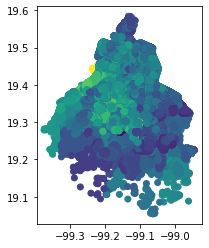

In [73]:
cdmx_nodes.plot("parti_max")

In [75]:
#Add weight=1 to all items to specify (later) that they all matter the same
cdmx_nodes["weight"] = 1

### Linking participation data to CDMX hex

In [96]:
#Downloading CDMX hex from database
hex8_cdmx = gpd.read_file("../../data/external/gobernance/cdmx/hex8_cdmx.gpkg") 

<AxesSubplot:>

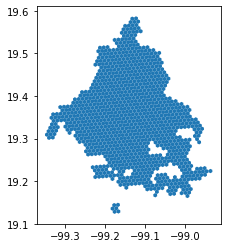

In [97]:
hex8_cdmx.plot()

In [83]:
#Linking participation data to hex.
#Function in aup>analysys
#socio_points_to_polygon(gdf_polygon,gdf_socio,cve_column[#La que tenga el ID del polígono],string_columns,
#wgt_dict=None[#Diccionario con dato:peso],avg_column=None[#datos]):
hex8_particdmx = aup.socio_points_to_polygon(hex8_cdmx,cdmx_nodes,cve_column="hex_id_8",string_columns=["Name"],wgt_dict={"parti_max":"weight"},avg_column=["parti_max"])
hex8_particdmx.head(1)

,x,y,street_count,parti_max,weight,hex_id_8
0,-15663.283203,3068.080322,480.0,0.504953,158.0,884995bb1bfffff


In [90]:
#keeping just id and parti_max
hex8_particdmx = hex8_particdmx[["hex_id_8","parti_max"]].copy()
hex8_particdmx.head(1)

,hex_id_8,parti_max
0,884995bb1bfffff,0.504953


### Adding city and geometry

In [91]:
#Original hex8 data
hex8_cdmx.head(1)

,hex_id_8,city,geometry
0,884995b8c1fffff,ZMVM,"POLYGON ((-99.17740 19.48241, -99.17776 19.487..."


In [92]:
#Keeping just the id, city and geometry
hex8_cdmx = hex8_cdmx[["hex_id_8","city","geometry"]].copy()

In [93]:
#Merging
hex8_partimaxcdmx = hex8_cdmx.merge(hex8_particdmx, on= "hex_id_8")
hex8_partimaxcdmx.head(1)

,hex_id_8,city,geometry,parti_max
0,884995b8c1fffff,ZMVM,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",0.519985


<AxesSubplot:>

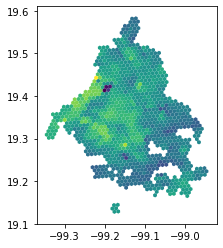

In [94]:
hex8_partimaxcdmx.plot("parti_max")

## Upload to database

In [95]:
aup.gdf_to_db_slow(hex8_partimaxcdmx,"participacion_cdmx_hexres8", 'governance', if_exists='replace')